# Práctica 1 Vectorización

Importamos las librerias que nos harán falta <br>
matplotlib para hacer gráficas <br>
Numpy para generar números aleatorios y operaciones con arrays <br>
Time para calcular el tiempo de cómputo <br>
scipy para comprobar el area de una función <br>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import integrate

In [2]:
def f(x):
    return np.sin(x)+1
    #return 2*x #puede ser cualquier funcion ej:ln(x)+3x+x^2

def plot_func(fun,a,b):
    x = np.linspace(a,b,50)
    y = fun(x)
    plt.plot(x,y)

    
def vector(fun,a,b,num_puntos,x_rand,y_rand): #vector method
    """Media de tiempo del metodo con 1000000 puntos es de 93ms"""
    return len(y_rand[y_rand < fun(x_rand)])
    

def loop(fun,a,b,num_puntos,x_rand,y_rand): #loop method
    """Media de tiempo del metodo con 1000000 puntos es de 953ms"""
    y_fun = fun(x_rand)
    debajo = 0
    for i in range(num_puntos):
        if y_rand[i] < y_fun[i]:
            debajo += 1
    return debajo


def integra_mc(fun, a, b, num_puntos=10000, print_out=True, method=vector):
    VAL = 10000
    x = np.linspace(a,b,VAL)
    y = np.array(fun(x))
    tic = time.process_time()
    x_rand = np.random.uniform(a,b,num_puntos)
    y_rand = np.random.uniform(min(y),max(y),num_puntos)
    debajo = method(fun,a,b,num_puntos,x_rand,y_rand)
    toc = time.process_time()
    if print_out:
        print("Tiempo: {}".format(1000*(toc-tic)))
        print("Nº Debajo: {}".format(debajo))
        print("Nº Total: {}".format(num_puntos))
        print("(b-a)M = {}".format((b-a)*max(y)))
        print("Area Vector: {}".format((debajo/num_puntos)*(b-a)*max(y)))
        plt.scatter(x_rand,y_rand,c='red',marker='x', alpha=0.5)
    return (debajo/num_puntos)*(b-a)*max(y)

Tiempo: 0.0
Nº Debajo: 50
Nº Total: 100
(b-a)M = 19.999999807419016
Area Vector: 9.999999903709508

Area de scipy: 11.839071529076453
Error: 1.8390716253669446


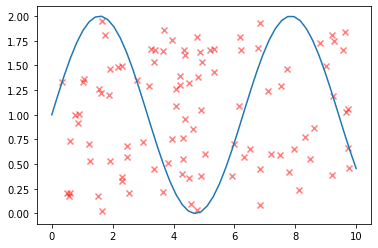

In [3]:
func = f
a = 0
b = 10
puntos = 100
plot_func(func,a,b)
mc_area = integra_mc(func,a,b,num_puntos=puntos)
print("\nArea de scipy: {}".format(integrate.quad(func,a,b)[0]))
print("Error: {}".format(abs(mc_area - integrate.quad(func,a,b)[0])))
plt.show()

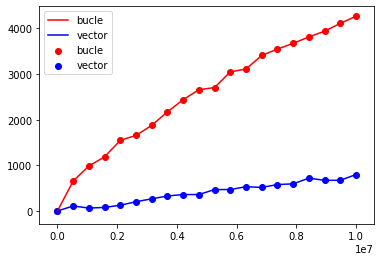

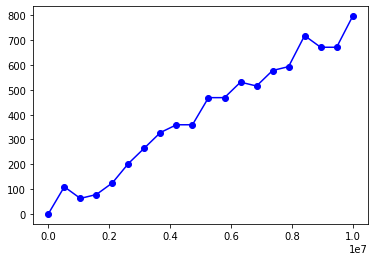

In [4]:
def integra_mc_time(fun, a, b, num_puntos=10000, method=vector):
    VAL = 1000
    x = np.linspace(a,b,VAL)
    y = np.array(fun(x))
    tic = time.process_time()
    x_rand = np.random.uniform(a,b,num_puntos)
    y_rand = np.random.uniform(min(y),max(y),num_puntos)
    method(fun,a,b,num_puntos,x_rand,y_rand)
    toc = time.process_time()
    return (1000*(toc-tic))

def compara_tiempos(fun,a,b):
    sizes = np.linspace(100,10000000,20) #100000000
    times_bucle = []
    times_fast = []
    for size in sizes:
        times_bucle += [integra_mc_time(fun,a,b,int(size),method=loop)]
        times_fast += [integra_mc_time(fun,a,b,int(size),method=vector)]
    plt.figure()
    plt.scatter(sizes,times_bucle, c='red', label='bucle')
    plt.plot(sizes,times_bucle, c='red', label='bucle')
    plt.scatter(sizes, times_fast, c='blue', label='vector')
    plt.plot(sizes, times_fast, c='blue', label='vector')
    plt.legend()
    plt.show()
    plt.scatter(sizes, times_fast, c='blue', label='vector')
    plt.plot(sizes, times_fast, c='blue', label='vector')
    plt.show()    


compara_tiempos(f,a,b)